#Step by step guide

* Load data
* Replace 0s → NaN
* Fill NaN with mean
* Scale data
* Split into train/test
* Train model (fit)
* Test model (predict)
* Evaluate accuracy



In [ ]:
import pandas as pd
import numpy as np


#Load dataset

In [ ]:
df = pd.read_csv("diabetes.csv")

#Replace invalid values

In [ ]:
# Columns where 0 is invalid
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0 with NaN in those columns
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Replace NaN with the column mean
for col in cols_with_zero:
    df[col] = df[col].fillna(np.mean(df[col]))

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


#Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("Outcome", axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled["Outcome"] = df["Outcome"].values
print(df_scaled)

     Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0       0.639947  0.865108      -0.033518   6.655021e-01 -3.345079e-16   
1      -0.844885 -1.206162      -0.529859  -1.746338e-02 -3.345079e-16   
2       1.233880  2.015813      -0.695306   8.087936e-16 -3.345079e-16   
3      -0.844885 -1.074652      -0.529859  -7.004289e-01 -7.243887e-01   
4      -1.141852  0.503458      -2.680669   6.655021e-01  1.465506e-01   
..           ...       ...            ...            ...           ...   
763     1.827813 -0.680125       0.297376   2.145261e+00  2.877840e-01   
764    -0.547919  0.010298      -0.198965  -2.451185e-01 -3.345079e-16   
765     0.342981 -0.022579      -0.033518  -7.004289e-01 -5.125386e-01   
766    -0.844885  0.141808      -1.026200   8.087936e-16 -3.345079e-16   
767    -0.844885 -0.943143      -0.198965   2.101918e-01 -3.345079e-16   

          BMI  DiabetesPedigreeFunction       Age  Outcome  
0    0.166292                  0.468492  1.425995 

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop("Outcome", axis=1)
y = df_scaled["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train)
print(X_test)
print(y_train)
print(y_test)
#print(y)


     Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
353    -0.844885 -1.041775      -0.860753  -1.952532e+00 -1.324631e+00   
711     0.342981  0.141808       0.462823  -2.451185e-01 -1.571789e+00   
373    -0.547919 -0.548616      -1.191647   1.234640e+00 -7.243887e-01   
46     -0.844885  0.799353      -1.357094   8.087936e-16 -3.345079e-16   
682    -1.141852 -0.877389      -0.695306   1.120812e+00 -5.949248e-01   
..           ...       ...            ...            ...           ...   
451    -0.547919  0.404826      -0.198965   8.087936e-16 -3.345079e-16   
113     0.046014 -1.502057      -0.860753   8.087936e-16 -3.345079e-16   
556    -0.844885 -0.811634      -0.198965   1.234640e+00 -3.345079e-16   
667     1.827813 -0.351352      -0.198965  -2.451185e-01 -3.345079e-16   
107     0.046014  0.733599      -1.191647  -1.312910e-01 -1.829940e-01   

          BMI  DiabetesPedigreeFunction       Age  
353 -0.765203                  0.326546 -0.786286  
711 -0.

In [ ]:
print(df_scaled.isnull().sum())   # Should show all 0s
print(df_scaled.describe())       # Check distribution after scaling


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -3.561966e-16   6.915764e-16   7.956598e-16 -3.330669e-16   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.141852e+00 -2.554131e+00  -4.004245e+00  -2.521670e+00 -1.665945e+00   
25%   -8.448851e-01 -7.212214e-01  -6.953060e-01  -4.727737e-01 -4.007289e-01   
50%   -2.509521e-01 -1.540881e-01  -1.675912e-02   8.087936e-16 -3.345079e-16   
75%    6.399473e-01  6.103090e-01   6.282695e-01   3.240194e-01 -3.345079e-16   
max    3.906578e+00  2.541850e+00   4.102655e+00   7.950467e+00  8.12

#Train the model

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Check accuracy

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6948051948051948
Confusion Matrix:
 [[81 19]
 [28 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



#Using Random Forest & KNN Classifier (Optional)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf.score(X_test, y_test))


Random Forest Accuracy: 0.7532467532467533


#How well the model predicts diabetic vs non-diabetic cases.

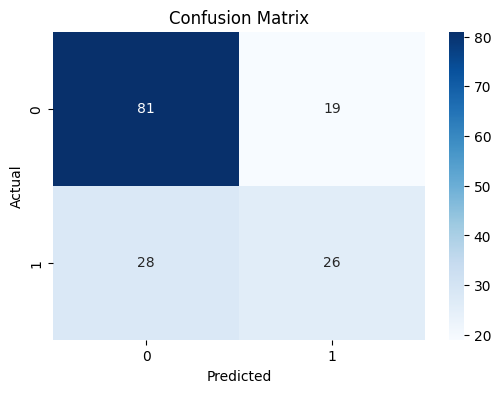

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Which features (like Glucose, BMI, Age, etc.) affect the prediction most.

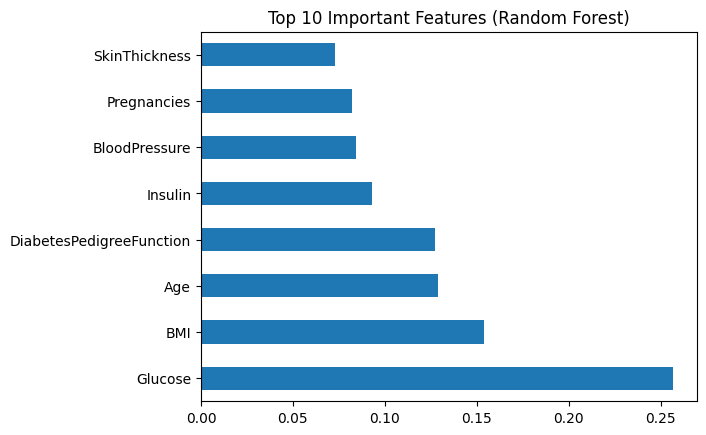

In [ ]:
import pandas as pd

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


#Compare actual vs predicted

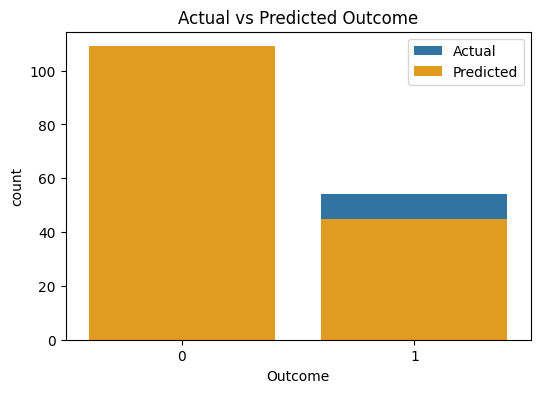

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_test, label='Actual')
sns.countplot(x=y_pred, label='Predicted', color='orange')
plt.legend()
plt.title("Actual vs Predicted Outcome")
plt.show()


#Accuracy comparison of models

If trained using Logistic Regression, Random Forest, and KNN, compare them:

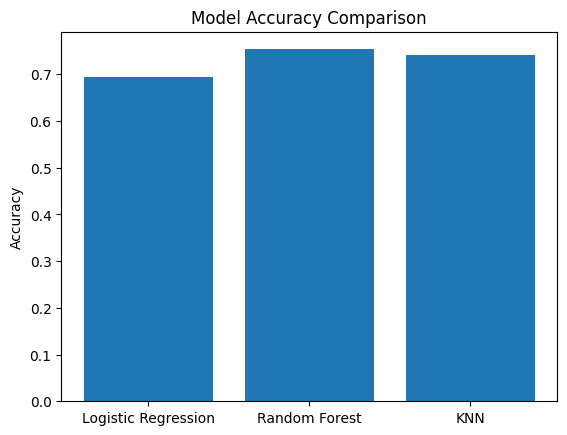

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

models = {
    "Logistic Regression": model.score(X_test, y_test),
    "Random Forest": rf.score(X_test, y_test),
    "KNN": knn.score(X_test, y_test)
}

plt.bar(models.keys(), models.values())
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()
